# MIE 1624 Project by  Group 1

## An investigation in the fators affecting the maize yield in Eastern Africa

In [1]:
!pip install statsmodels
!pip install plotly
import pandas as pd
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from sklearn.linear_model import RANSACRegressor
import numpy as np
from scipy.stats.stats import pearsonr 
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn
import plotly
%matplotlib inline 

    100% |████████████████████████████████| 6.2MB 158kB/s 
    100% |████████████████████████████████| 235kB 4.2MB/s 
    100% |████████████████████████████████| 1.1MB 883kB/s 
    100% |████████████████████████████████| 163kB 4.2MB/s 
  Running setup.py bdist_wheel for plotly ... - \ | / - done
  Stored in directory: /home/notebook/.cache/pip/wheels/cc/87/3f/6a282eb21da5d8223472bed40ee023cdcf2e9691b117969a4c
Successfully built plotly
  Found existing installation: nbformat 4.0.1
    Not uninstalling nbformat at /usr/local/lib/python3.5/dist-packages, outside environment /resources/common/.virtualenv/python3


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Part 1: Clean and standardize the data

Read the output file

In [2]:
#Reads and standardize the output data
def readOutput(outputfile):
    output_df=pd.read_csv(outputfile)
    output_df=output_df[['Year','Value','Area']]
    output_df.columns=['Year','yield_value','Area']
    return output_df

In [3]:
output = readOutput('yield.csv')
output.head()


,Year,yield_value,Area
0,1961,9596,Burundi
1,1962,10322,Burundi
2,1963,9081,Burundi
3,1964,10158,Burundi
4,1965,10084,Burundi


Read the input file 

In [4]:
#Define a function to extract and standardize the required input data
def readInput(inputfile, inputname):

    input_df=pd.read_csv(inputfile, encoding='latin1')

    #Extracts columns from file
    if 'Area' in input_df.columns:
        #input_parameter=input_parameter[input_parameter['Area']=='Kenya']
        #input_parameter=input_parameter[input_parameter['Months']=='March']
        input_df=input_df[['Year','Value','Area']]
    else:
        #input_parameter = input_parameter[input_parameter['Country'] == 'Kenya']
        input_df = input_df[['Year', 'Value', 'Country']]
    #renames columns    
    input_df.columns=['Year',inputname,'Area']  
    return input_df

In [5]:
input_fdi = readInput('Foreign_investment.csv', 'FDI')
input_soilc = readInput('Soil_Carbon.csv', 'soilc')
input_P = readInput('Fertilizer_P.csv', 'P')
input_K = readInput('Fertilizer_K.csv', 'K')
input_N = readInput('Fertilizer_N.csv', 'N')
input_pest = readInput('Pest.csv', 'pest')
input_tractor = readInput('Tractor.csv', 'tractor')
input_harvester = readInput('Harvester.csv', 'harvester')
input_precip= readInput('Precipitation.csv', 'precipitation')

#input_dfs = [input_fdi, input_soilc, input_P, input_K, input_N, input_pest, input_tractor, input_harvester ]

dfMerge will merge the dataframes of the output and a specified input variable

In [6]:
def dfMerge(output_df, input_df):
        
    merged_df=output_df.merge(input_df,on=['Year','Area'])
                
    return merged_df

In [7]:
fdi_merge_df = dfMerge(output, input_fdi)
soilc_merge_df = dfMerge(output, input_soilc)
P_merge_df = dfMerge(output, input_P)
K_merge_df = dfMerge(output, input_K)
N_merge_df = dfMerge(output, input_N)
pest_merge_df = dfMerge(output, input_pest)
tractor_merge_df = dfMerge(output, input_tractor)
harvester_merge_df = dfMerge(output, input_harvester)
precipitation_merge_df = dfMerge(output, input_precip)

In [8]:
fdi_merge_df.head()

,Year,yield_value,Area,FDI
0,1994,11235,Ethiopia,0.1
1,1995,13590,Ethiopia,0.1
2,1996,16826,Ethiopia,0.1
3,1998,16175,Ethiopia,0.0
4,1999,17150,Ethiopia,4.1


## Part 2 Data visualization

We will now plot the input vs. the output and use the plotOutlier function to highlight any potential outliers. The top 10% most likely outliers will be highlighted.


In [9]:
#OUTLIER DETECTION
def plotOutlier(df, input_name, threshold):
    
    d = df.yield_value.values.reshape(len(df), 1)
    a = df[input_name].values.reshape(len(df), 1)

    fig, axes = plt.subplots(ncols=2, sharey=True)

    
    axes[0].scatter(a, d, c='g')
    axes[0].set_xlabel(input_name)
    axes[0].set_ylabel('yield')

    robust_estimator = RANSACRegressor(random_state=0)
    robust_estimator.fit(a, d)
    d_pred = robust_estimator.predict(a)

    # calculate mse
    mse = (d - d_pred) ** 2

    index = np.argsort(mse.ravel())

    axes[1].scatter(a[index[:-int(threshold*len(df))]], d[index[:-int(threshold*len(df))]], c='b', label='inliers', alpha=0.2)
    axes[1].scatter(a[index[-int(threshold*len(df)):]], d[index[-int(threshold*len(df)):]], c='r', label='outliers')
    axes[1].set_xlabel(input_name)
    axes[1].legend(loc=2)
    
    

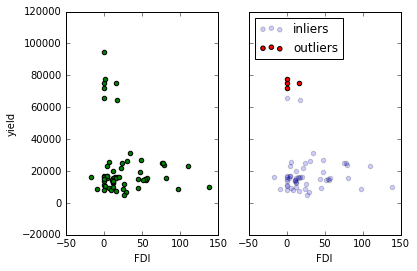

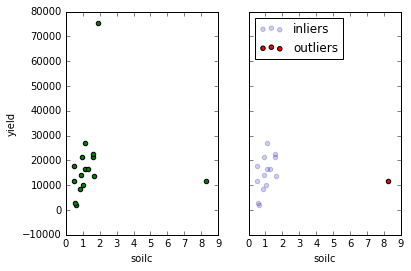

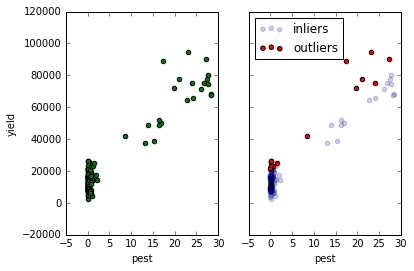

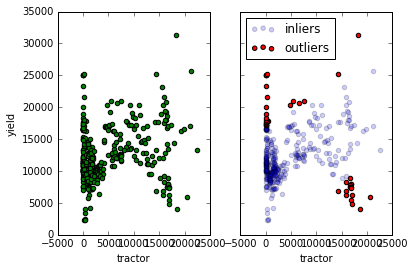

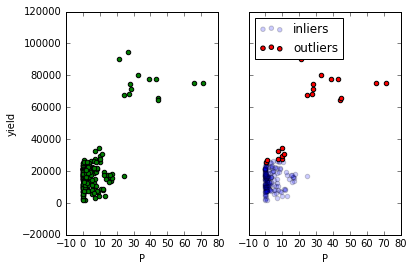

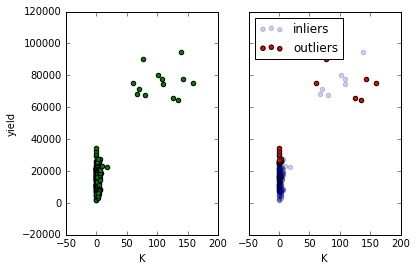

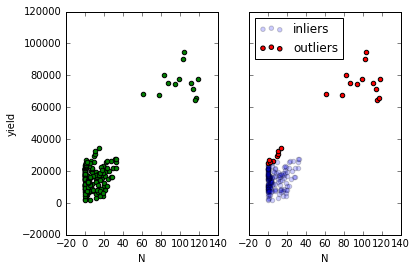

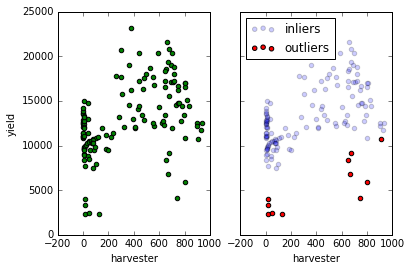

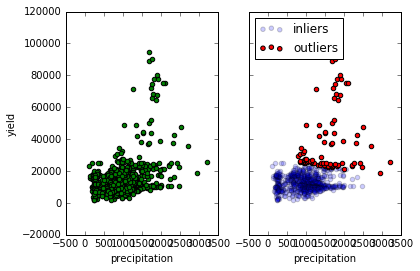

In [10]:
plotOutlier(fdi_merge_df, 'FDI', 0.1)
plotOutlier(soilc_merge_df, 'soilc', 0.1)
plotOutlier(pest_merge_df, 'pest', 0.1)
plotOutlier(tractor_merge_df, 'tractor', 0.1)
plotOutlier(P_merge_df, 'P', 0.1)
plotOutlier(K_merge_df, 'K', 0.1)
plotOutlier(N_merge_df, 'N', 0.1)
plotOutlier(harvester_merge_df, 'harvester', 0.1)
plotOutlier(precipitation_merge_df, 'precipitation', 0.1)

Right off the bat, soilc looks like a questionable input. There are very few data points and visual inspection doesn't look too promising. This input will likely be discluded for later predictions.

The next variables: FDI, harvester, tractor, and precipitation don't have any immediately apparent trends. The points are too scattered so we will leave them and do more indepth analysis later. They look better than soilc but still not too promising.

Looking at the charts for Pesticide, P, K and N, a positive linear relationship can be seen. However, there appears to be outliers. These outliers all seem to belong to a different cluster. These supposed outliers in the other cluster all have high yields and high values of the input. As such,  we sort our df by the yield to investigate those data points.


In [11]:
fdi_merge_df.sort(['yield_value'], ascending=[0]).head(10)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,Year,yield_value,Area,FDI
25,2007,94537,Mauritius,0.6
24,2006,77931,Mauritius,0.8
26,2008,75410,Mauritius,15.7
23,2005,75397,Mauritius,0.6
20,2001,72037,Mauritius,0.5
21,2003,65556,Mauritius,0.0
22,2004,64737,Mauritius,17.6
47,2001,31359,United Republic of Tanzania,34.1
41,2008,26855,Uganda,48.0
16,2007,26547,Malawi,30.2


Index(['Year', 'Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia',
       'Kenya', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Rwanda',
       'South Sudan', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe'],
      dtype='object')


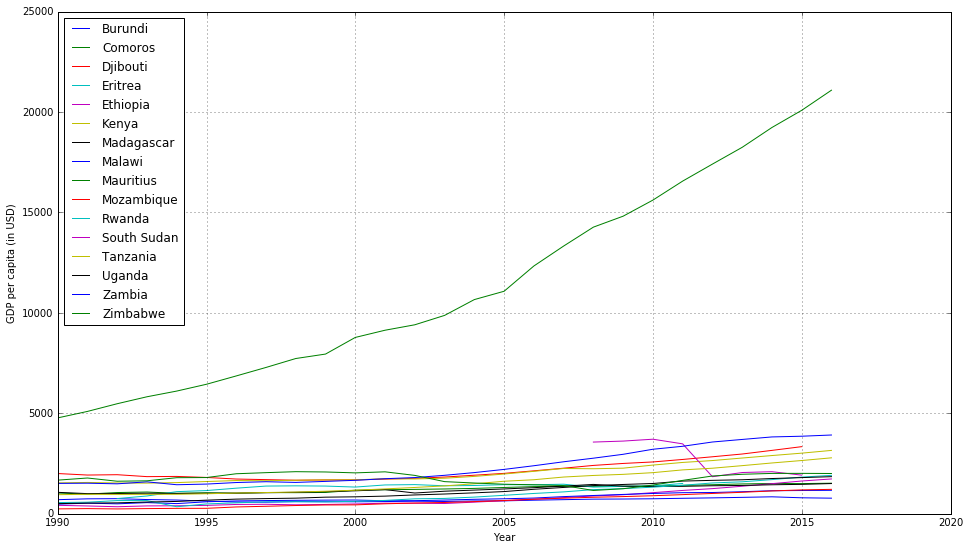

In [12]:
gdp = pd.read_csv('gdp.csv')
print(gdp.columns)
fig, ax = plt.subplots()
fig.set_size_inches(16,9)
labels = []
for i in range(1, len(gdp.keys())):
    ax.plot(gdp.iloc[:,0], gdp.iloc[:,i])
    labels.append(gdp.keys()[i])

ax.legend(labels, loc='upper left')
plt.xlabel("Year")
plt.ylabel("GDP per capita (in USD)")
plt.grid()

So we notice something interesting, all of the highlighted points belong to the country Mauritius. Some quick research reveals that Mauritius is a well developed (highest GDP per capita in east africa) small island off the east coast of Africa. Being a small island, Maurtius must make the most of its land by increasing their crop yield. Seeing as they are well developed, they can do this by investing in large amounts of fertilizer and pesticides, besides, they don't have high FDI because they are already rich enough. It then makes sense why they have significantly higher yield and fertilzer/pesticide use than the other countries in Eastern Africa. Therefore, these "outlier points" are not noise and were not removed from the data.

We will now determine the correlation coefficients of the input variables with regard to the crop yield. This will tell us if the variables are correlated to the output. If there is statistical correlation, we will investigate more indepth to ensure that these correlations are spurious.

In [13]:
def correlation(df, input_name):

    return pearsonr(df[input_name],df['yield_value'])

In [14]:
#Determine coefficient correlation for our inputs
corSoil, pvalSoil = correlation(soilc_merge_df, 'soilc' )
corK, pvalK = correlation(K_merge_df, 'K' )
corN, pvalN = correlation(N_merge_df, 'N' )
corP, pvalP = correlation(P_merge_df, 'P' )
corPest, pvalPest = correlation(pest_merge_df, 'pest' )
corTractor, pvalTractor = correlation(tractor_merge_df, 'tractor' )
corFDI, pvalFDI = correlation(fdi_merge_df, 'FDI' )
corHarvester, pvalHarvester = correlation(harvester_merge_df, 'harvester' )
corPrecip, pvalPrecip = correlation(precipitation_merge_df, 'precipitation' )

In [15]:
print ('Soil C Correlation Coefficient: %f ,  Pvalue: %f ' % (corSoil, pvalSoil))
print ('K Correlation Coefficient: %f ,  Pvalue: %f ' % (corK, pvalK))
print ('N Correlation Coefficient: %f ,  Pvalue: %f ' % (corN, pvalN))
print ('P Correlation Coefficient: %f ,  Pvalue: %f ' % (corP, pvalP))
print ('Pesticide Correlation Coefficient: %f ,  Pvalue: %f ' % (corPest, pvalPest))
print ('Tractor Correlation Coefficient: %f ,  Pvalue: %f ' % (corTractor, pvalTractor))
print ('FDI Correlation Coefficient: %f ,  Pvalue: %f ' % (corFDI, pvalFDI))
print ('Harvester Correlation Coefficient: %f ,  Pvalue: %f ' % (corHarvester, pvalHarvester))
print ('Precipitation Correlation Coefficient: %f ,  Pvalue: %f ' % (corPrecip, pvalPrecip))

Soil C Correlation Coefficient: 0.046256 ,  Pvalue: 0.864927 
K Correlation Coefficient: 0.871410 ,  Pvalue: 0.000000 
N Correlation Coefficient: 0.869365 ,  Pvalue: 0.000000 
P Correlation Coefficient: 0.761324 ,  Pvalue: 0.000000 
Pesticide Correlation Coefficient: 0.943973 ,  Pvalue: 0.000000 
Tractor Correlation Coefficient: 0.233806 ,  Pvalue: 0.000002 
FDI Correlation Coefficient: -0.183318 ,  Pvalue: 0.164597 
Harvester Correlation Coefficient: 0.458910 ,  Pvalue: 0.000000 
Precipitation Correlation Coefficient: 0.333137 ,  Pvalue: 0.000000 


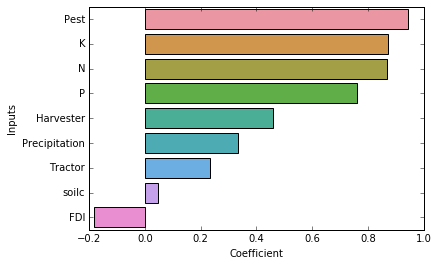

In [16]:
#Plot the coefficients
coeff = [corSoil, corK, corN, corP, corPest, corTractor, corFDI, corHarvester, corPrecip]
in_names = ['soilc','K','N','P','Pest','Tractor', 'FDI','Harvester','Precipitation']
bar_df= pd.DataFrame({ 'Inputs': in_names, 'Coefficient' : coeff}).sort_values("Coefficient", ascending=False)
seaborn.barplot(x='Coefficient', y='Inputs', data = bar_df)

Pearson correlation tests for non-correlation. Therefore the null hypothesis is that the two data sets are uncorrelated. A low P-value in this case would reject the null hypothesis indicating that the data does not support the null hypthesis. In this scenario, a low P-value w/ and significant coefficient means that our population is correlated. This is true for our inputs of: K, P, N and Pesticide.

As such, we will include K, P, N and Pesiticide as out input variables and omit the rest. Applying a logic check, it would make sense that yield is positively correlated to fertilzers (K,P,N) and pesticide.

We will now merge our inputs and output into a single dataframe in preparation for our predictive model. We will also use this dataframe to check for correlation between input variables. If the variables are correlated, then their effects may be masked by  latent factors or interactions.

In [17]:
data = output.merge(input_P, how='outer').merge(input_K, how='outer').merge(input_N, how='outer').merge(input_pest, how='outer')

In [18]:
data.head()

,Year,yield_value,Area,P,K,N,pest
0,1961.0,9596.0,Burundi,NaN,NaN,NaN,NaN
1,1962.0,10322.0,Burundi,NaN,NaN,NaN,NaN
2,1963.0,9081.0,Burundi,NaN,NaN,NaN,NaN
3,1964.0,10158.0,Burundi,NaN,NaN,NaN,NaN
4,1965.0,10084.0,Burundi,NaN,NaN,NaN,NaN


The resulting dataframe has many empty entries which we need to fill. There are 3 methods which we consider.
1. We can remove all rows with empty entries. This will not induce any bias or skew our data. However, the downside is that we are likely to have very few if not no entries remaining.
2. We can clear rows with more than 3 empty values and impute the average values into the remaining empty cells. This can introduce bias and skew the data because we are essentially changing our dataset
***3. We can imput the empty values using the Bayesion Network method.

We will proceed with option 2.

In [19]:
#OPTION 1: REMOVE ALL NaNs
#newdf=data
#for i in range(data.shape[0]):
    #if data.iloc[i,:].isnull().sum() > 0:
        #newdf = newdf.drop(i)


In [20]:
#OPTION 2: clear out data point with more than 3 nan, and impute the mean for the remaining missing data
filtered_data = data

for i, row in data.iterrows():
    if row.isnull().sum() >= 3:
        filtered_data = filtered_data.drop(i)

        
filtered_data.reset_index(drop=True, inplace=True)
filtered_data.Year = filtered_data.Year.astype(int).astype(str)
filtered_data = filtered_data.fillna(filtered_data.mean())
print(filtered_data.mean(numeric_only = True))
# The result after filling the 'NAN'
print(filtered_data.head())

yield_value    18990.170616
P                  5.301607
K                  7.617500
N                 11.983973
pest               4.220482
dtype: float64
   Year  yield_value     Area     P     K     N  pest
0  2002      10931.0  Burundi  0.59  0.01  0.38  0.07
1  2003      10670.0  Burundi  0.00  0.01  0.21  0.20
2  2004      10807.0  Burundi  0.46  0.03  0.31  0.37
3  2005      10833.0  Burundi  1.69  0.03  0.82  0.23
4  2006      10159.0  Burundi  0.49  0.68  1.14  0.15


## Part 3 Model Establishment

Firstly we input all the possible features and use the multifactors linear model. We shuffle the data and split it into training set (fration=0.8) and test set. Then we do a tentative linear regression. The summary is shown below:

In [21]:
X = filtered_data[['P', 'K', 'N', 'pest','Year']]
y = filtered_data['yield_value']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_traindf = y_train.to_frame()
filtered_data_train = x_train.join(y_traindf)
filtered_data_train_list = []
filtered_data_train_list.append(filtered_data_train)
model1 = ols('yield_value ~ N + K + P + pest ', filtered_data_train).fit()
print(model1.summary(),'\n')

                            OLS Regression Results                            
Dep. Variable:            yield_value   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     177.3
Date:                Fri, 17 Nov 2017   Prob (F-statistic):           3.01e-60
Time:                        03:14:09   Log-Likelihood:                -1835.6
No. Observations:                 179   AIC:                             3681.
Df Residuals:                     174   BIC:                             3697.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.13e+04    769.239     14.687      0.0

The model gave us high adjusted R square and low F-value. However, the P-values of feature 'P' and 'K' are high. As we set the confidence level at 95%,  we fail to reject the null hypothesis that the coefficients equal to 0. Based on this, we establish two more linear models: 1. Drop the 'P' feature. 2: Drop both 'K' and 'P' features.

We loop these models 500 times and evaluate their performances based on their average error rates across 500 times. The result is shown below: 

In [22]:
model1_error = []
model2_error = []
model3_error = []
model1_coeff = {}
model2_coeff = {}
model3_coeff = {}
filtered_data_train_list = []
# Extract the data 
from sklearn import metrics
X = filtered_data[['P', 'K', 'N', 'pest','Year']]
y = filtered_data['yield_value']
# Regression 500 times:
for i in range(0,500):
    #Shuffle the data
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    y_traindf = y_train.to_frame()
    filtered_data_train = x_train.join(y_traindf)
    filtered_data_train_list.append(filtered_data_train)
    # Make a regression:
    model1 = ols('yield_value ~ N + K +P + pest ', filtered_data_train).fit()
    model2 = ols('yield_value ~ N +K + pest', filtered_data_train).fit()
    model3 = ols('yield_value ~ N  + pest', filtered_data_train).fit()
    ypred1 = model1.predict(x_test)
    ypred2 = model2.predict(x_test)
    ypred3 = model3.predict(x_test)
    # Evaluate the error rate:
    model1_e = metrics.mean_absolute_error(y_test, ypred1)/np.mean(y_test)
    model2_e = metrics.mean_absolute_error(y_test, ypred2)/np.mean(y_test)
    model3_e = metrics.mean_absolute_error(y_test, ypred3)/np.mean(y_test)
    # Store the results:
    model1_error.append(model1_e)
    model2_error.append(model2_e)
    model3_error.append(model3_e)
    model1_coeff[i] = model1.params.tolist()
    model2_coeff[i] = model2.params.tolist()
    model3_coeff[i] = model3.params.tolist()

print('The average error rate of model K P N Pest is:',np.mean(model1_error))  
print('The average error rate of model K N Pest is:',np.mean(model2_error))
print('The average error rate of model N Pest is:',np.mean(model3_error))

The average error rate of model K P N Pest is: 0.291827698338
The average error rate of model K N Pest is: 0.291216136935
The average error rate of model N Pest is: 0.293286802462


Based on the results above, the model with features 'K N Pest' has the best performance thus it is chosen. Then we try to find the best version of it produced in the loop. We choose the version with the lowest error rate as the optimal one among the 500 'K N Pest' model. The summary of the optimal model is shown below:

In [23]:
optimal = min(model2_error)
print('The lowest error rate is:',optimal)
opt_index = model2_error.index(optimal)
opt_coeff = model2_coeff[opt_index]
opt = filtered_data_train_list[opt_index]
print('The parameters of the model is:',opt_coeff)
model2 = ols('yield_value ~ N +K + pest', opt).fit()
print(model2.summary())

The lowest error rate is: 0.19912596349
The parameters of the model is: [11087.007076550297, 203.78281213324161, 169.2194767848442, 960.55631250284421]
                            OLS Regression Results                            
Dep. Variable:            yield_value   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     213.0
Date:                Fri, 17 Nov 2017   Prob (F-statistic):           3.59e-58
Time:                        03:14:34   Log-Likelihood:                -1838.2
No. Observations:                 179   AIC:                             3684.
Df Residuals:                     175   BIC:                             3697.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|    

## Part 4 Estimate Required Amount of Fertilizer & Pesticide

In this part, we will determine the amount fertilizer and pesticide is needed in order to increase the yield of maize by 60%. We assume that all inputs would increase with the same proportion, otherwise we would have infinite combinations of solutions. Also, we take the average value of fertilizer and pesticide usage as input, i.e. if every country can reach this average value, the yield of maize will increase by 60% for all eastern Africa countries.

In [24]:
#The expected increase rate of each factor to achieve a 60% yield in crease based on current mean
expected_rate = (18990.170616*(1+0.6)-opt_coeff[0])/(7.6175*opt_coeff[2]+11.983973*opt_coeff[1]+4.220482*opt_coeff[3])-1
print('Expected increase rate of inputs = ', expected_rate)

Expected increase rate of inputs =  1.47872192719


In [25]:
#Calculate expected average use of fertilizers and pesticide according to the model, assuming all inputs increase with the same proprtionss
print('expected mean value of fertilizers, pesticide and yield: \n', filtered_data.mean(numeric_only = True)*(1 + expected_rate))

expected mean value of fertilizers, pesticide and yield: 
 yield_value    47071.352307
P                 13.141210
K                 18.881664
N                 29.704937
pest              10.461401
dtype: float64
